<a href="https://colab.research.google.com/github/ipsitaster/machine-learning-interview/blob/master/Copy_of_Stripe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import import_item
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def load_dataset():
    df = pd.read_csv('takehome_ds_written.csv')
    df['time'] = pd.to_datetime(df['time'])
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute
    df['second'] = df['time'].dt.second
    df['weekday'] = df['time'].dt.weekday
    df['week'] = df['time'].dt.week
    df['day_of_year'] = df['time'].dt.dayofyear
    df['day_of_month'] = df['time'].dt.day
    df['week_of_year'] = df['time'].dt.weekofyear
    df['quarter'] = df['time'].dt.quarter
    df['is_weekend'] = df['time'].dt.weekday.isin([5,6]).astype(int)
    df['is_weekday'] = df['time'].dt.weekday.isin([0,1,2,3,4]).astype(int)
    df['is_month_start'] = df['time'].dt.is_month_start.astype(int)
    df.drop('time', axis=1, inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    return df

In [ ]:
# Main
df = load_dataset()
df.head()
df.info

<bound method DataFrame.info of            merchant  amount_usd_in_cents  day  month  year  hour  minute  \
0        faa029c6b0                 6349   17      6  2034    23      34   
1        ed7a7d91aa                 3854   27     12  2034     0      40   
2        5608f200cf                  789   30      4  2034     1      29   
3        15b1a0d61e                 4452   16      9  2034     1       6   
4        4770051790                20203   22      7  2034    16      21   
...             ...                  ...  ...    ...   ...   ...     ...   
1513714  72d37bedbf                 5274   21      6  2034    13      47   
1513715  5608f200cf                  754   20      4  2034     2      23   
1513716  fcbd1dae68                13203   19      9  2033    14       2   
1513717  9843e52410                 4845   28     12  2034    20       7   
1513718  32acddd6cc                 3862   23      8  2034     9       7   

         second  weekday  week  day_of_year  day_of_mon

In [ ]:
# prompt: find correlation of df

df.corr()

,amount_usd_in_cents,day,month,year,hour,minute,second,weekday,week,day_of_year,day_of_month,week_of_year,quarter,is_weekend,is_weekday,is_month_start
amount_usd_in_cents,1.000000,-0.003346,0.007078,0.004654,0.009196,0.000309,-0.001131,-0.015205,0.007557,0.006727,-0.003346,0.007557,0.007315,-0.018143,0.018143,0.021221
day,-0.003346,1.000000,0.001198,-0.015293,0.002036,-0.000666,-0.000336,-0.015269,0.080018,0.087307,1.000000,0.080018,0.009454,-0.013945,0.013945,-0.344034
month,0.007078,0.001198,1.000000,-0.094842,0.007448,-0.000327,0.000678,0.028294,0.988490,0.996268,0.001198,0.988490,0.970269,0.025813,-0.025813,0.016620
year,0.004654,-0.015293,-0.094842,1.000000,-0.001028,-0.001013,-0.000587,0.016655,-0.090262,-0.095875,-0.015293,-0.090262,-0.095960,0.022720,-0.022720,0.019288
hour,0.009196,0.002036,0.007448,-0.001028,1.000000,0.017578,-0.000854,-0.019915,0.007537,0.007528,0.002036,0.007537,0.006704,-0.033696,0.033696,-0.009408
minute,0.000309,-0.000666,-0.000327,-0.001013,0.017578,1.000000,-0.001215,-0.000317,-0.000390,-0.000383,-0.000666,-0.000390,-0.000378,-0.001798,0.001798,0.000085
second,-0.001131,-0.000336,0.000678,-0.000587,-0.000854,-0.001215,1.000000,-0.000242,0.000782,0.000649,-0.000336,0.000782,0.000469,-0.000065,0.000065,-0.000763
weekday,-0.015205,-0.015269,0.028294,0.016655,-0.019915,-0.000317,-0.000242,1.000000,0.015252,0.026850,-0.015269,0.015252,0.025775,0.767606,-0.767606,0.027182
week,0.007557,0.080018,0.988490,-0.090262,0.007537,-0.000390,0.000782,0.015252,1.000000,0.991671,0.080018,1.000000,0.960787,0.017912,-0.017912,0.007893
day_of_year,0.006727,0.087307,0.996268,-0.095875,0.007528,-0.000383,0.000649,0.026850,0.991671,1.000000,0.087307,0.991671,0.967351,0.024497,-0.024497,-0.013115


In [ ]:
# how many unique merchants are there in the dataset?
len(df['merchant'].unique())

14351

In [ ]:
# total amount spent across each merchant
var = df.groupby(['merchant', 'year', 'month']).agg(total_usd_in_cents = ('amount_usd_in_cents', 'sum'))
#var.sort_values('total_usd_in_cents', ascending=False)


KeyboardInterrupt: ignored

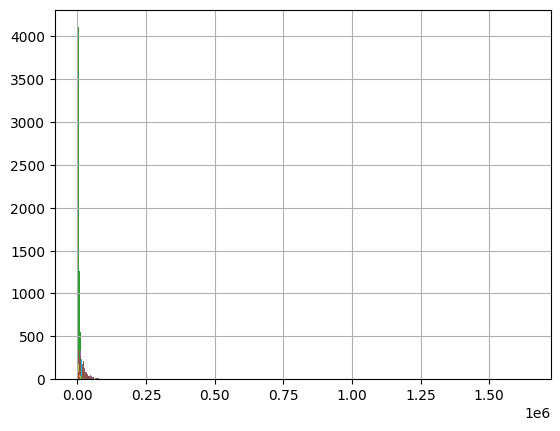

In [ ]:
# prompt: generate histogram of merchant vs amount_usd_in_cent across 2033 and 2034
df.groupby(['merchant', 'year'])['amount_usd_in_cents'].hist(bins=100)

In [ ]:
# prompt: generate statistics of amount_usd_in_cent spent across each merchant per month and year

df.groupby(['merchant', 'month', 'year'])['amount_usd_in_cents'].agg(['count', 'mean', 'std', 'min', 'max'])

In [ ]:
# prompt: predict churn of the merchant

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
# prompt: statistically analyze df

df.corr()

len(df['merchant'].unique())

df.groupby(['merchant', 'year'])['amount_usd_in_cents'].hist(bins=100)

df.groupby(['merchant', 'month', 'year'])['amount_usd_in_cents'].agg(['count', 'mean', 'std', 'min', 'max'])

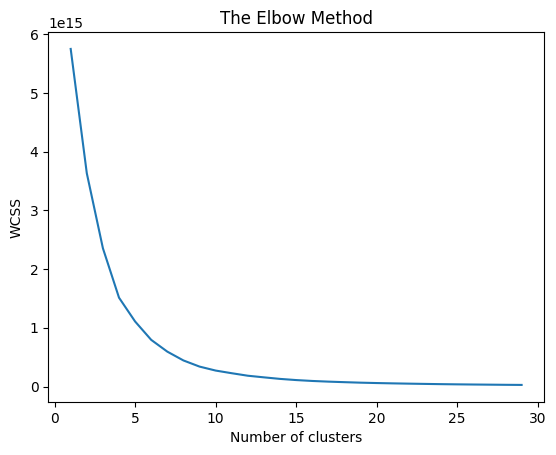

In [ ]:
# https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
from sklearn.cluster import KMeans
# Find the optimal number of clusters using the elbow method
features = ['amount_usd_in_cents',
            'day',
            'month',
            'year',
            'hour',
            'minute',
            'second',
            'weekday',
            'week',
            'day_of_year',
            'day_of_month',
            'week_of_year',
            'quarter']
df = df[features]

# Elbow method
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fit KMeans to the data
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(df)

# Predict the clusters for each data point
labels = kmeans.predict(df)
print(labels)
print(len(labels))

# Visualize the clusters
# plt.scatter(df['amount_usd_in_cents'], c=labels)
# plt.show()

[ 0  0  0 ... 17  0  0]
1513719
